<a href="https://colab.research.google.com/github/Exanom/Shap_ConceptDirft_examples/blob/main/beginner_shap_showcase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Examples from: https://domino.ai/blog/shap-lime-python-libraries-part-1-great-explainers-pros-cons

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=84e8effe5dfca99550d4d854e9f3476f5971f40d44c5294fdfdf455b79b43ffc
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
# Load Libraries
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import sklearn.ensemble
import numpy as np
import shap
import xgboost as xgb
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import seaborn as sns
import time
%matplotlib inline



In [ ]:

X,y = shap.datasets.diabetes()
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# K Nearest Neighbor
knn = sklearn.neighbors.KNeighborsRegressor()
knn.fit(X_train, y_train)

# Create the SHAP Explainers
# SHAP has the following explainers: deep, gradient, kernel, linear, tree, sampling
# Must use Kernel method on knn
# Summarizing the data with k-Means is a trick to speed up the processing

# build the kmeans summary
X_train_summary = shap.kmeans(X_train, 10)

# using the kmeans summary
t0 = time.time()
explainerKNN = shap.KernelExplainer(knn.predict,X_train_summary)
shap_values_KNN_test = explainerKNN.shap_values(X_test)
t1 = time.time()
timeit=t1-t0




  0%|          | 0/89 [00:00<?, ?it/s]

In [ ]:
print(X)
#print(y)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1  

In [ ]:
shap.initjs()
# now we can plot the SHAP explainer
print(X_test.iloc[0])
shap.force_plot(explainerKNN.expected_value, shap_values_KNN_test[0], X_test.iloc[[0]])


age    0.019913
sex    0.050680
bmi    0.104809
bp     0.070072
s1    -0.035968
s2    -0.026679
s3    -0.024993
s4    -0.002592
s5     0.003709
s6     0.040343
Name: 362, dtype: float64


In [ ]:
shap.initjs()
shap.force_plot(explainerKNN.expected_value, shap_values_KNN_test[1], X_test.iloc[[1]])

In [ ]:
# Load useful libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

iris = pd.read_csv("Iris.csv")

X = iris.drop(columns=['Species','Id'])
y = iris['Species']

# Create Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,
                                                	stratify =y,
                                                	random_state = 13)

# Build the model
rf_clf = RandomForestClassifier(max_features=2, n_estimators =100 ,bootstrap = True)

rf_clf.fit(X_train, y_train)

# Make prediction on the testing data
y_pred = rf_clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [ ]:
print(X.iloc[0])

SepalLengthCm    5.1
SepalWidthCm     3.5
PetalLengthCm    1.4
PetalWidthCm     0.2
Name: 0, dtype: float64


Class Setosa:


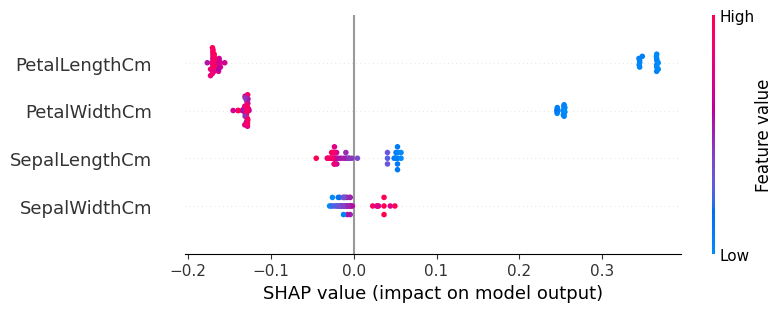

Class versicolor:


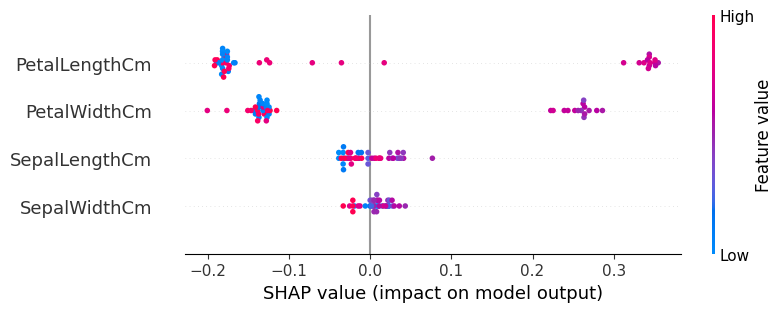

Class Virginica:


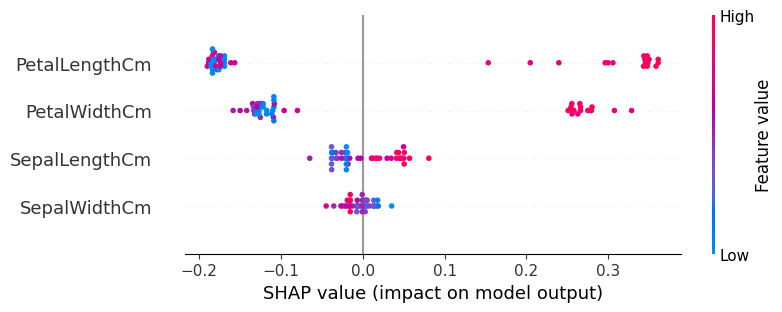

In [ ]:
shap.initjs()


explainer = shap.TreeExplainer(rf_clf)
shap_values = explainer(X_test)

num_classes = shap_values.values.shape[-1]
names = ['Setosa','versicolor','Virginica']
for i in range(num_classes):
    print(f"Class {names[i]}:")
    shap.plots.beeswarm(shap_values[:, :, i])

In [ ]:
print(shap_values)